In [4]:
from clspde.solution import Solution
from clspde.solution import lp as l
from clspde.basis import Basis
import itertools
import numpy as np

function_list = ['m']
variable_list = ['x','y']

def lp(line, function_list=function_list, variable_list = variable_list):
    res = l(line, function_list, variable_list)
    return lambda u_loc, u_bas, x, x_loc: eval(res)

def dir(point: np.array) -> np.array:
    direction = (np.abs(point) == 1) * (np.sign(point)) 
    return np.array(direction, dtype=int)

def f_collocation_points(N):
    points = np.zeros(N+1)
    h = 2/(N+1)
    points[0] = -1 + h/2
    for i in range(1, N+1):
        points[i] = points[i-1] + h
    return np.array(points).reshape(N+1,1)

In [5]:
power = 3

c_p_1d = f_collocation_points(power).reshape(power+1)
colloc_points = np.array(list(itertools.product(c_p_1d, c_p_1d)))

connect_points = np.array([[-1, 0.5], [1, 0.5],
                            [0.5, -1], [0.5, 1],
                            [-1, -0.5], [1, -0.5],
                            [-0.5, -1], [-0.5, 1],])
border_points = np.array([[-1, 0.5], [-1, -0.5],
                            [0.5, -1], [-0.5, -1],])

def exact_sol(point):
    y, x = point
    return x*y

def f(point):
    y, x = point
    return x+y

colloc_left_operators = [lp('(d/dx) m + (d/dy) m')]
colloc_right_operators = [lp('f(x)')]

border_left_operators = [lp('m')]
border_right_operators = [lp('exact_sol(x)')]
points = (colloc_points, connect_points, border_points)

connect_left_operators = [lambda _, u_bas, x, x_loc: u_bas(0*dir(x_loc)) + np.sum(dir(x_loc)) * u_bas(dir(x_loc)),]
connect_right_operators = [lambda _, u_nei, x, x_loc: u_nei(0*dir(x_loc)) + np.sum(dir(x_loc))*u_nei(dir(x_loc)),]

connect_ops = [connect_left_operators, connect_right_operators]
colloc_ops = [colloc_left_operators, colloc_right_operators]
border_ops = [border_left_operators, border_right_operators]

iteration_dict = {'points':points,
        'colloc_ops':colloc_ops,
        'border_ops':border_ops,
        'connect_ops':connect_ops}

params = {
    'n_dims': 2,
    'dim_sizes': np.array([4, 4]),
    'area_lims': np.array([[0,1], [0,1]]),
    'power': power,
    'basis': Basis(power),
}
sol = Solution(**params)

sol.solve(verbose = True, **iteration_dict)

0.5876095156318534
0.5605548321078977
0.2017682060228632
0.051104719921262955
0.03826174953022565
0.03973224844882073
0.04288182390833395
0.034749038053307674
0.019719583237924082
0.01637383901135525
0.016073947809031264
0.01401437389200011
0.011993239565473157
0.010144695307655605
0.008846821433889818
0.007744053519647021
0.0067794594476930925
0.0058994135008094695
0.005137492694555212
0.004479736054882388
0.0039129100064828615
0.0034178974555750807
0.0029854074174854306
0.002607609209869133
0.0022782998008508137
0.00199102519958394
0.0017402409718759726
0.0015211472765019884
0.0013297323990332233
0.0011624877730828098
0.0010163492319447132
0.0008886288750863391
0.0007769904105081604
0.0006793994417518823
0.0005940833480374552
0.0005194938457144804
0.00045427881956672245
0.00039725734735462925
0.0003473981500105028
0.00030380029345944415
0.0002656765339967837
0.00023233883743012385
0.0002031858353982452
0.00017769186413418847
0.00015539739873959846
0.00013590069897517765
0.00011885052

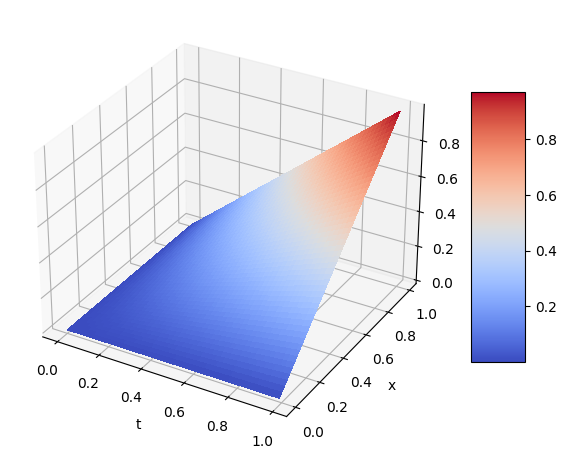

In [6]:
sol.plot2d(n = 100)